# Model Test With images

## Importing Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import mediapipe as mp

## Load The Model And Defining Class Labels

In [2]:
new_model = tf.keras.models.load_model('models/Eye_Model2.h5')
class_names = ['Close-Eyes', 'Open-Eyes']

## Loading and Displaying an Image


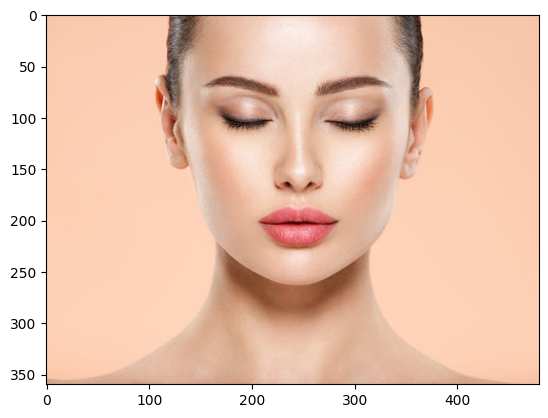

In [ ]:
img = cv2.imread("images/closedEyes.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Initialize MediaPipe Face Mesh

In [4]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

## Convert the image to RGB

In [5]:
# Convert the image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process the image to detect faces and facial landmarks
results = face_mesh.process(img_rgb)


## Process and Draw Bounding Boxes Around Eyes

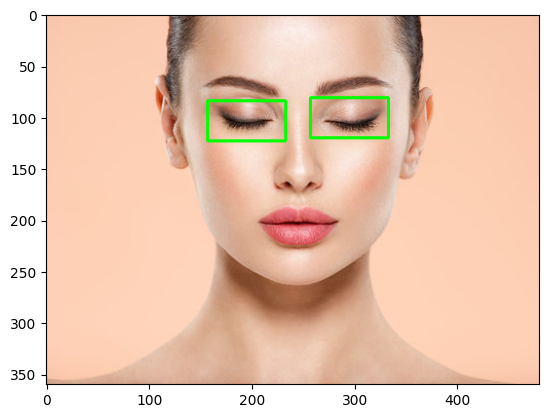

In [6]:
# Check if landmarks were detected
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Get landmarks for both eyes (right eye and left eye)
        left_eye_landmarks = [33, 133, 153, 154, 155, 133]
        right_eye_landmarks = [263, 362, 387, 386, 385, 362]

        # Initialize min and max values for the bounding box
        left_eye_x_min, left_eye_y_min = float('inf'), float('inf')
        left_eye_x_max, left_eye_y_max = -float('inf'), -float('inf')

        right_eye_x_min, right_eye_y_min = float('inf'), float('inf')
        right_eye_x_max, right_eye_y_max = -float('inf'), -float('inf')

        # Get the pixel coordinates for the left eye landmarks
        h, w, _ = img.shape
        for idx in left_eye_landmarks:
            x, y = int(face_landmarks.landmark[idx].x * w), int(face_landmarks.landmark[idx].y * h)
            left_eye_x_min = min(left_eye_x_min, x)
            left_eye_y_min = min(left_eye_y_min, y)
            left_eye_x_max = max(left_eye_x_max, x)
            left_eye_y_max = max(left_eye_y_max, y)

        # Get the pixel coordinates for the right eye landmarks
        for idx in right_eye_landmarks:
            x, y = int(face_landmarks.landmark[idx].x * w), int(face_landmarks.landmark[idx].y * h)
            right_eye_x_min = min(right_eye_x_min, x)
            right_eye_y_min = min(right_eye_y_min, y)
            right_eye_x_max = max(right_eye_x_max, x)
            right_eye_y_max = max(right_eye_y_max, y)

        # Apply padding to the bounding boxes to extend their width and height
        padding = 16  # Add padding to the bounding box for better coverage
        left_eye_x_min -= padding
        left_eye_y_min -= padding
        left_eye_x_max += padding
        left_eye_y_max += padding

        right_eye_x_min -= padding
        right_eye_y_min -= padding
        right_eye_x_max += padding
        right_eye_y_max += padding

        # Draw bounding boxes around the eyes using the adjusted coordinates
        cv2.rectangle(img, (left_eye_x_min, left_eye_y_min), (left_eye_x_max, left_eye_y_max), (0, 255, 0), 2)
        cv2.rectangle(img, (right_eye_x_min, right_eye_y_min), (right_eye_x_max, right_eye_y_max), (0, 255, 0), 2)

        # Show the image with rectangles drawn
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()


## Crop Eye Regions and Preprocess for Prediction

In [7]:
# Crop the eye regions for further prediction
left_eye_roi = img[left_eye_y_min:left_eye_y_max, left_eye_x_min:left_eye_x_max]
right_eye_roi = img[right_eye_y_min:right_eye_y_max, right_eye_x_min:right_eye_x_max]

# Preprocess the eye regions for model prediction
IMAGE_SIZE = 256

# Resize and preprocess the left eye image
left_eye_final = cv2.resize(left_eye_roi, (IMAGE_SIZE, IMAGE_SIZE))
left_eye_final = np.expand_dims(left_eye_final, axis=0)  # Add batch dimension
left_eye_final = left_eye_final / 255.0  # Normalize

# Resize and preprocess the right eye image
right_eye_final = cv2.resize(right_eye_roi, (IMAGE_SIZE, IMAGE_SIZE))
right_eye_final = np.expand_dims(right_eye_final, axis=0)  # Add batch dimension
right_eye_final = right_eye_final / 255.0  # Normalize


## Make Predictions for the Eyes

In [8]:
# Make the prediction for the left eye
left_eye_predictions = new_model.predict(left_eye_final)
left_eye_predicted_class = class_names[np.argmax(left_eye_predictions[0])]
left_eye_confidence = round(100 * (np.max(left_eye_predictions[0])), 2)
print(f"Left Eye Predicted: {left_eye_predicted_class}.\nConfidence: {left_eye_confidence}%")

# Make the prediction for the right eye
right_eye_predictions = new_model.predict(right_eye_final)
right_eye_predicted_class = class_names[np.argmax(right_eye_predictions[0])]
right_eye_confidence = round(100 * (np.max(right_eye_predictions[0])), 2)
print(f"Right Eye Predicted: {right_eye_predicted_class}.\nConfidence: {right_eye_confidence}%")

Left Eye Predicted: Close-Eyes.
Confidence: 92.72%
Right Eye Predicted: Close-Eyes.
Confidence: 94.11%
